In [8]:
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("data/loan_train.csv")

In [10]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [12]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [14]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

TREATING NULL VALUES

In [15]:
freq = df["Gender"].mode()
df["Gender"] = df["Gender"].fillna(freq.iloc[0])


df["Gender"].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [16]:
freq = df["Dependents"].mode()
df["Dependents"] = df["Dependents"].fillna(freq.iloc[0])


In [17]:
freq = df["Married"].mode()
df["Married"] = df["Married"].fillna(freq.iloc[0])

In [18]:
freq = df["Self_Employed"].mode()
df["Self_Employed"] = df["Self_Employed"].fillna(freq.iloc[0])

In [19]:
mea = round(df["Term"].mean())
df["Term"] = df["Term"].fillna(mea)

In [20]:
freq = df["Credit_History"].mode()
df["Credit_History"] = df["Credit_History"].fillna(freq.iloc[0])

ANALYSIS

VISUALIZATION

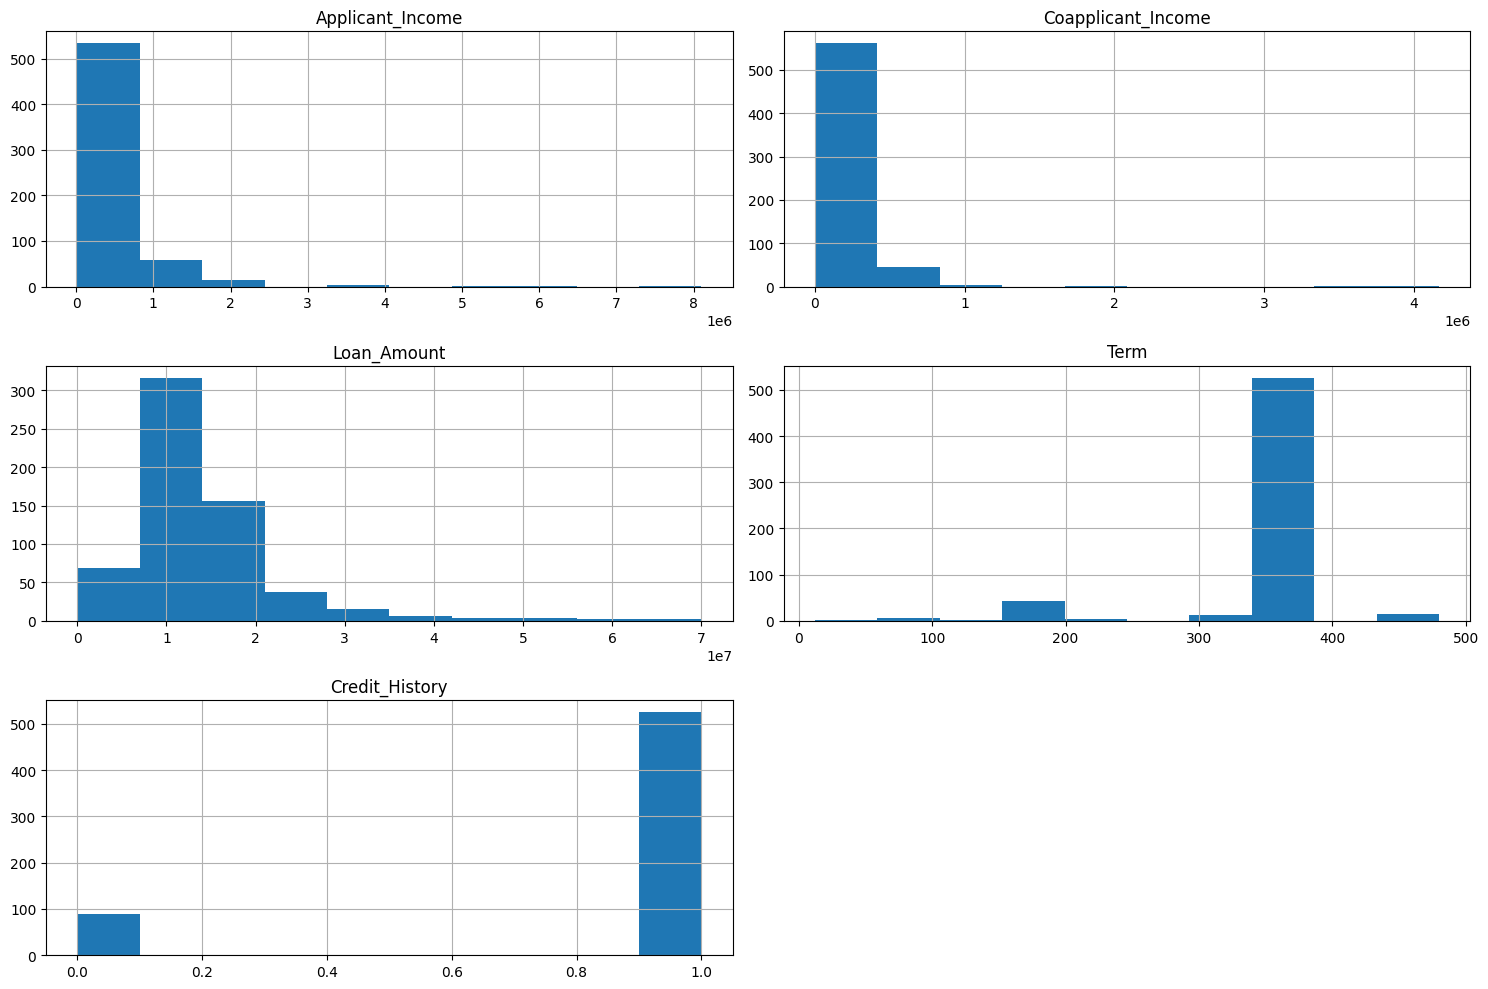

In [21]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


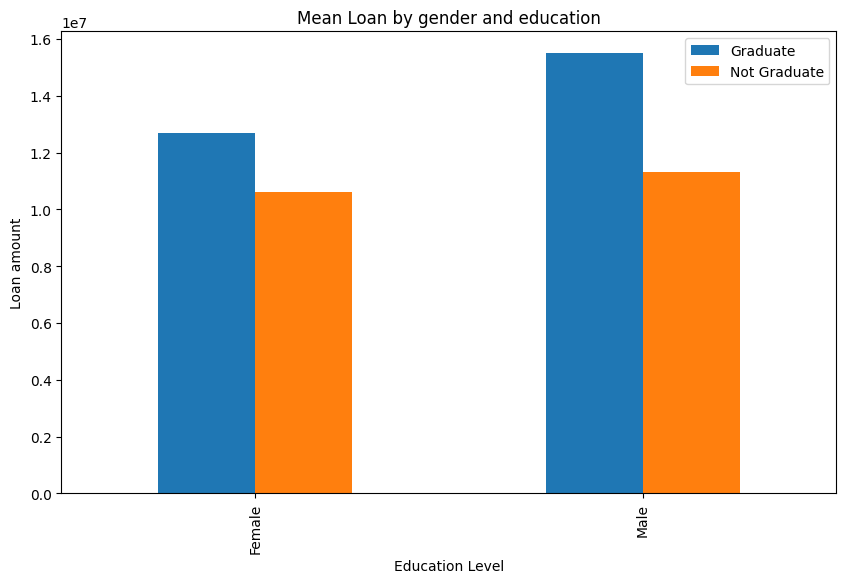

In [24]:
data = df.groupby(["Gender","Education"])["Loan_Amount"].mean()
#this creates gender as cols and education as rows

datas = data.unstack()

ax = datas.plot(kind='bar',figsize=(10,6))
plt.title("Mean Loan by gender and education")
plt.xlabel("Education Level")
plt.ylabel("Loan amount")
plt.legend()

#on avg graduate man demands for more loan then graduate femlae
#graduate male and female on avg takes larger loan amount then not graduate male and females

Relationship plot catagorical variable with target

Text(0.5, 1.0, 'Loan Status by Gender')

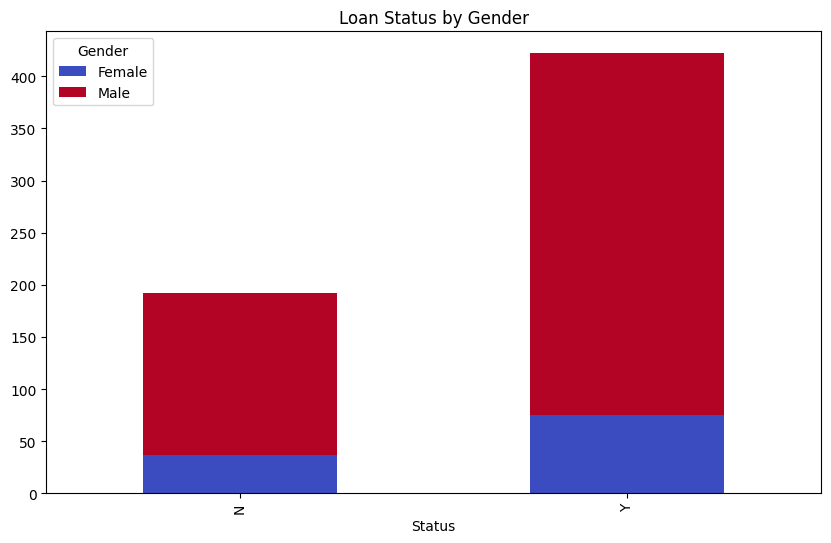

In [64]:

data = pd.crosstab(df["Status"],df["Gender"])
data.plot(kind='bar',stacked=True,figsize=(10,6),cmap='coolwarm')

#on avg male have higer chances of apporoval and disapproval of loan then female  its because man tends to have higher papulation 
plt.title("Loan Status by Gender")

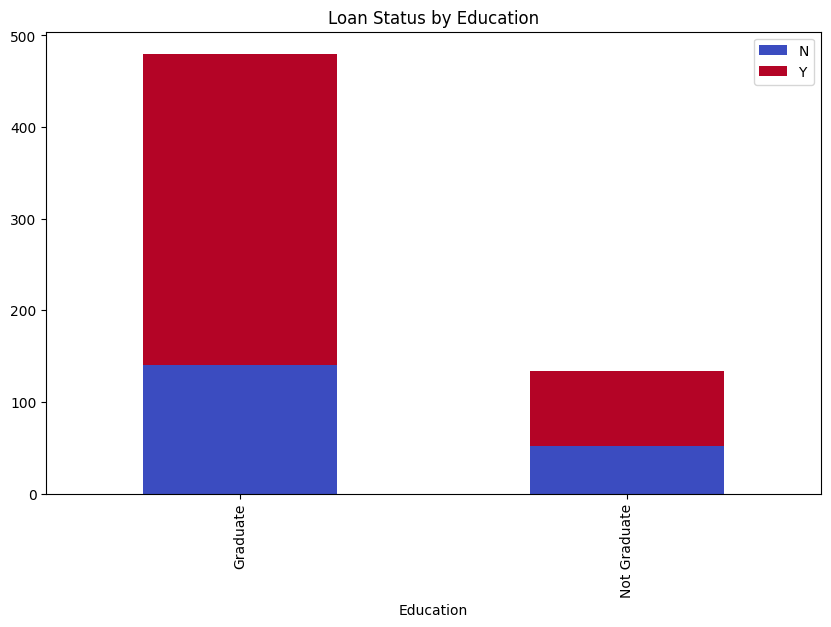

In [66]:
#on avg graduated people are more likely to get loan approval
#quetion loan approval status  interms on area
data = pd.crosstab(df["Education"],df["Status"])


data.plot(kind='bar',stacked=True,figsize=(10,6),cmap='coolwarm')
plt.title("Loan Status by Education")
plt.legend()


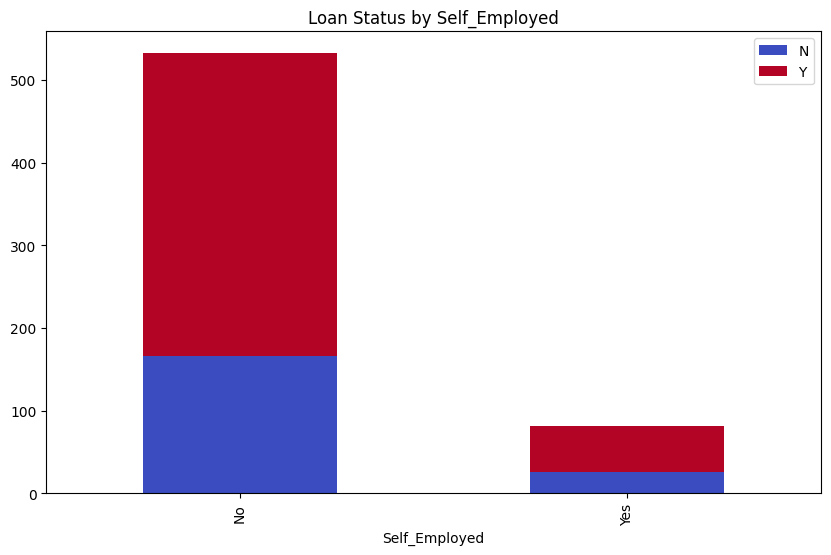

In [67]:
#self employed vs loan status
data = pd.crosstab(df["Self_Employed"],df["Status"])


data.plot(kind='bar',stacked=True,figsize=(10,6),cmap='coolwarm')
plt.title("Loan Status by Self_Employed")
plt.legend()

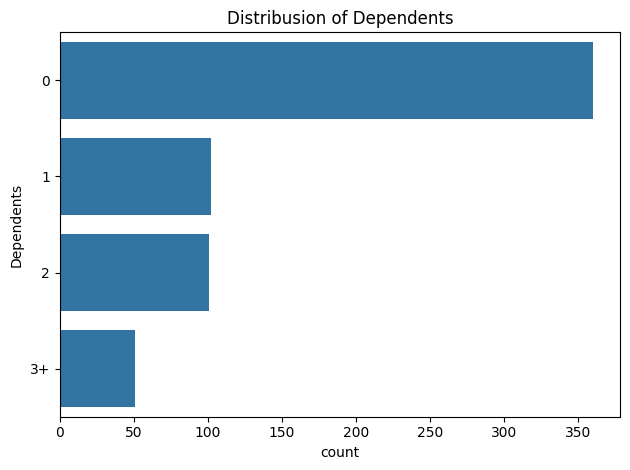

In [ ]:
#“Most applicants in the loan prediction dataset have 0 dependents.
sns.countplot(df["Dependents"])
plt.title("Distribusion of Dependents")
plt.tight_layout()


Relation ship between numeric features

Text(0.5, 1.0, 'Relation between Income and Loan Amount')

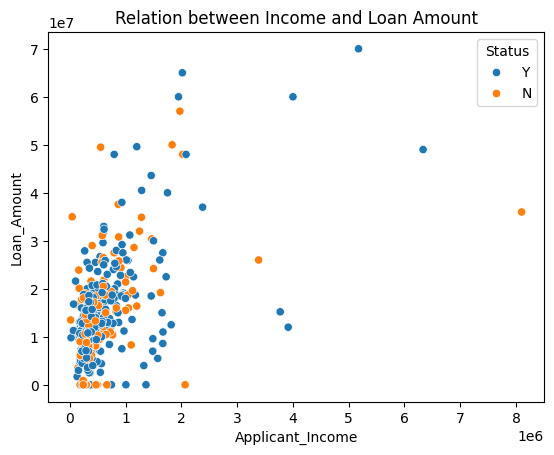

In [72]:
#Applicant_Income vs Loan_Amount
sns.scatterplot(data=df,x='Applicant_Income',y='Loan_Amount',hue='Status')
plt.title("Relation between Income and Loan Amount")

boxplot between numerical and catagoorcal Features

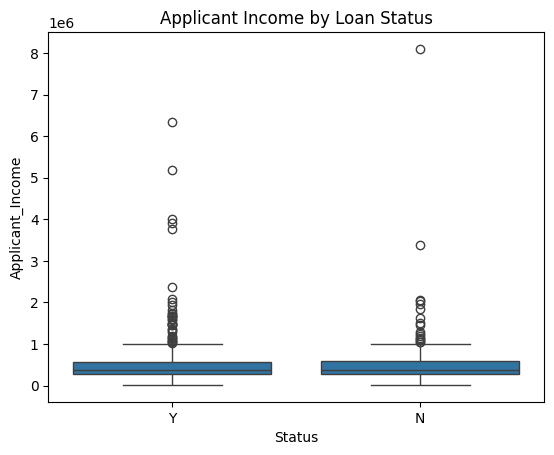

In [ ]:
sns.boxplot(data=df, x="Status", y="Applicant_Income")
plt.title("Applicant Income by Loan Status")
plt.show()

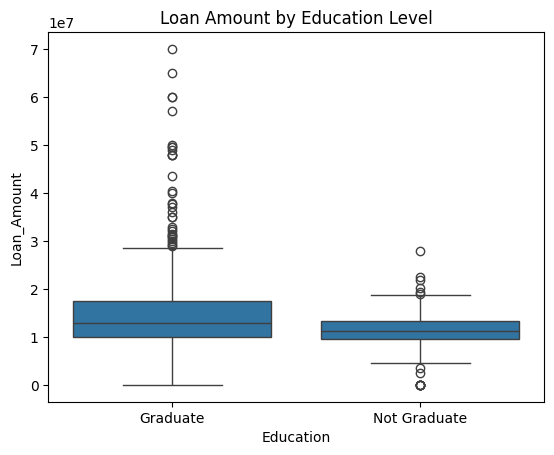

In [ ]:
sns.boxplot(data=df, x="Education", y="Loan_Amount")
plt.title("Loan Amount by Education Level")
plt.show()

correlation heatmap

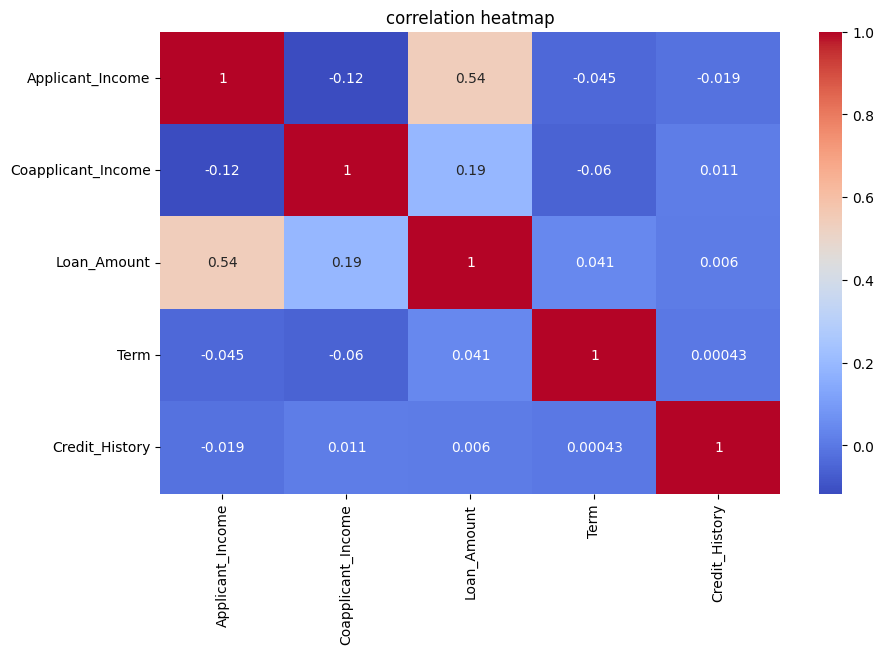

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['int','float']).corr(),annot=True,cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()